In [3]:
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class AbstractGradientDescend(object):
    def __init__(self, learning_rate=0.001, max_iters=5):
        self.learning_rate = learning_rate
        self.max_iters = max_iters

    def hypothesis(self, x, a): 
        return np.dot(x, a)

    def gradient(self, x, y, a):
        # h = self.hypothesis(x, a) 
        # grad = np.dot(x.transpose(), (h - y)) 
        # grad = np.dot(x.dot(x.T), a)
        # E = (y - y_hat)^2 = (x*theta - y_hat)^2
        # E' = ((x*theta - y_hat)^2)' = 2*x*theta - y_hat*theta
        # print(y.shape)
        # print(x.shape)
        # print(y.dot(x))
        # print((2 * a) * x.dot(x.T))
        n = float(x.shape[0])
        grad = (1.0 / n) * np.sum(-2 * x.dot(y - a*x)) 
        # grad = (1 / x.shape[0]) * grad
        return grad

    def cost(self, X, y, theta): 
        h = self.hypothesis(X, theta)
        n = float(X.shape[0]) 
        J = (1.0 / n) * np.sum(np.square(y - h))
        # print('cost')
        # print(np.sum(np.square(y - h)))
        # print(1.0 / n)
        # print(n)
        # J = np.dot((h - y).transpose(), (h - y)) 
        # J /= 2
        return J

    def gradient_descend(self, x, y):
        theta = 1
        error_list = [] 
        for itr in range(self.max_iters): 
            theta, errors = self.gradient_descend_step(x, y, theta)
            error_list.extend(errors)

        return theta, error_list

    def gradient_descend_step(self, x, y, theta):
        return 0, []


def do_gradiend_descend(gd_alg):
    mean = np.array([5.0, 6.0]) 
    cov = np.array([[1.0, 0.95], [0.95, 1.2]]) 
    data = np.random.multivariate_normal(mean, cov, 8000) 
    
    # visualising data 
    plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
    plt.show() 
    
    # train-test-split 
    data = np.hstack((np.ones((data.shape[0], 1)), data)) 
    
    split_factor = 0.90
    split = int(split_factor * data.shape[0]) 
    
    X_train = data[:split, :-1][:, 1]
    y_train = data[:split, -1] 
    X_test = data[split:, :-1][:, 1] 
    y_test = data[split:, -1]  # .reshape((-1, 1)) 

    # print(data[split:, -1].shape)
    # print(data[split:, -1].reshape((-1, 1)).shape)

    theta, error_list = gd_alg.gradient_descend(X_train, y_train)
    plt.plot(error_list) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show()

    print('Theta: ' + str(theta))
    y_pred = gd_alg.hypothesis(X_test, theta) 
    plt.scatter(X_test[:, ], y_test[:, ], marker = '.') 
    plt.plot(X_test[:, ], y_pred, color = 'orange') 
    plt.show() 
    
    # calculating error in predictions 
    # y_pred = y_pred.reshape((y_pred.shape[0], 1))
    error = np.sum(np.abs(y_test - y_pred)) / float(y_test.shape[0]) 
    print("Mean absolute error = ", error)

In [5]:
class StochasticGradientDescend(AbstractGradientDescend):
    def gradient_descend_step(self, x, y, theta):
        error_list = []
        new_x = x.copy()
        new_y = y.copy()
        for i in range(len(x)):
            choice = np.random.randint(0, len(new_x)) if len(x) > 1 else 0

            _x = new_x[choice]
            _y = new_y[choice]

            new_x = np.delete(new_x, (choice), axis=0)
            new_y = np.delete(new_y, (choice), axis=0)

            _x = np.reshape(_x, (1, 1))
            _y = np.reshape(_y, (1, 1))


            theta = theta - self.learning_rate * self.gradient(_x, _y, theta) 
            
            # print(self.cost(_x, _y, theta)[0, 0])
            error_list.append(self.cost(_x, _y, theta))

        # theta = theta[0, 0]
        return theta, error_list



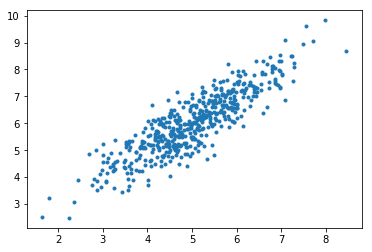

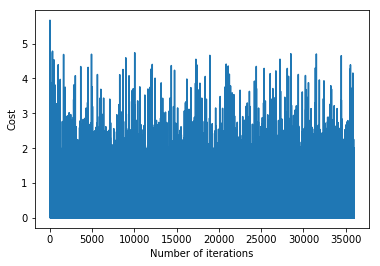

Theta: 1.1803534037891723


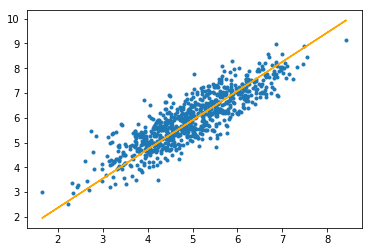

Mean absolute error =  0.4726340087629874


In [6]:
s_grad = StochasticGradientDescend(learning_rate=0.0001)
do_gradiend_descend(s_grad)

In [7]:
class BatchGradientDescend(AbstractGradientDescend):
    def __init__(self, *args, **kwargs):
        super(BatchGradientDescend, self).__init__(*args, **kwargs)

    def gradient_descend_step(self, x, y, theta):
        error_list = []
        # new_y = y.squeeze()
        theta = theta - self.learning_rate * self.gradient(x, y, theta) 

        cost = self.cost(x, y, theta)
        error_list.append(cost)
        return theta, error_list

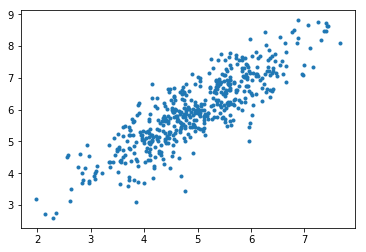

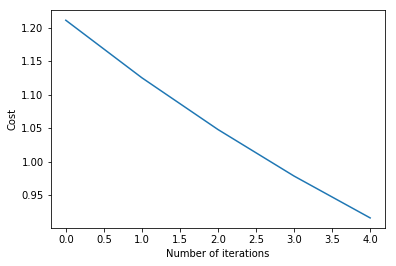

Theta: 1.044645510758979


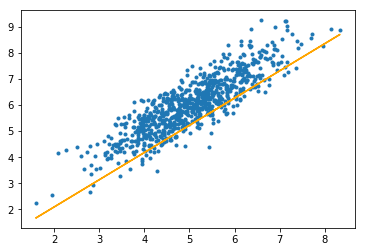

Mean absolute error =  0.820546106490917


In [8]:
s_grad = BatchGradientDescend()
do_gradiend_descend(s_grad)

In [9]:
class MiniBatchGradientDescend(AbstractGradientDescend):
    def __init__(self, batch_size=64, *args, **kwargs):
        super(MiniBatchGradientDescend, self).__init__(*args, **kwargs)
        self.batch_size = batch_size
    
    def create_mini_batches(self, X, y): 
        mini_batches = [] 
        # data = np.hstack((X, y)) 
        s = np.arange(X.shape[0])
        np.random.shuffle(s) 
        n_minibatches = X.shape[0] // self.batch_size 
        i = 0
    
        for i in range(n_minibatches + 1): 
            mini_batch = s[i * self.batch_size: (i + 1) * self.batch_size] 
            X_mini = X[mini_batch] 
            Y_mini = y[mini_batch]
            mini_batches.append((X_mini, Y_mini)) 
        # if X.shape[0] % self.batch_size != 0: 
        #     mini_batch = s[i * self.batch_size: s.shape[0]] 
        #     X_mini = mini_batch[:, :-1] 
        #     Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        #     mini_batches.append((X_mini, Y_mini)) 
        return mini_batches 
    
    # function to perform mini-batch gradient descent 
    def gradient_descend_step(self, X, y, theta): 
        error_list = []
        mini_batches = self.create_mini_batches(X, y) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - self.learning_rate * self.gradient(X_mini, y_mini, theta) 
            error_list.append(self.cost(X_mini, y_mini, theta)) 
    
        return theta, error_list


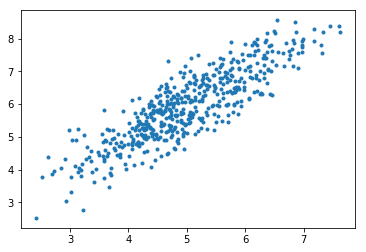

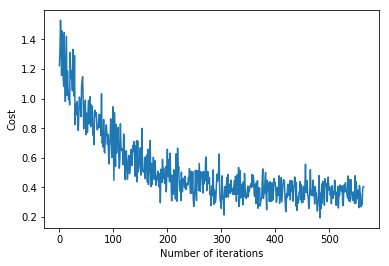

Theta: 1.1812280415595042


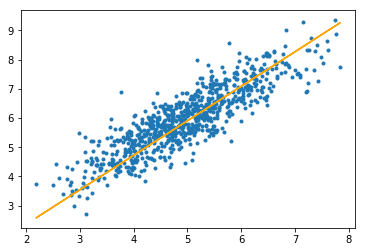

Mean absolute error =  0.47757432205443506


In [10]:
s_grad = MiniBatchGradientDescend(learning_rate=0.0001)
do_gradiend_descend(s_grad)

In [11]:
class NesterovAcceleratedGradient(AbstractGradientDescend):
    def __init__(self, batch_size=64, nu=0.9, *args, **kwargs):
        super(NesterovAcceleratedGradient, self).__init__(*args, **kwargs)
        self.batch_size = batch_size
        self.nu = nu
    
    def create_mini_batches(self, X, y): 
        mini_batches = [] 
        # data = np.hstack((X, y)) 
        s = np.arange(X.shape[0])
        np.random.shuffle(s) 
        n_minibatches = X.shape[0] // self.batch_size 
        i = 0
    
        for i in range(n_minibatches + 1): 
            mini_batch = s[i * self.batch_size: (i + 1) * self.batch_size] 
            X_mini = X[mini_batch] 
            Y_mini = y[mini_batch]
            mini_batches.append((X_mini, Y_mini)) 
        # if X.shape[0] % self.batch_size != 0: 
        #     mini_batch = s[i * self.batch_size: s.shape[0]] 
        #     X_mini = mini_batch[:, :-1] 
        #     Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        #     mini_batches.append((X_mini, Y_mini)) 
        return mini_batches 
    
    # function to perform mini-batch gradient descent 
    def gradient_descend_step(self, X, y, theta): 
        error_list = []
        mini_batches = self.create_mini_batches(X, y) 
        v = 0
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            v = self.nu * v + self.learning_rate * self.gradient(X_mini, y_mini, theta - self.nu*v) 
            theta = theta - v
            error_list.append(self.cost(X_mini, y_mini, theta)) 
    
        return theta, error_list


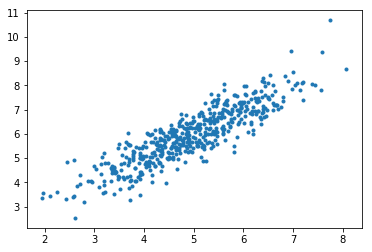

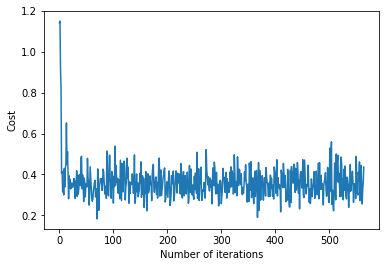

Theta: 1.1737362715428459


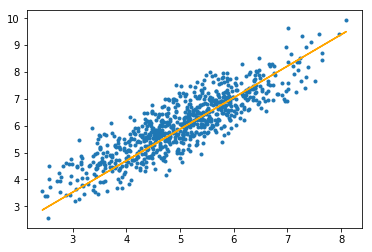

Mean absolute error =  0.5015111164408171


In [12]:
s_grad = NesterovAcceleratedGradient(learning_rate=0.001)
do_gradiend_descend(s_grad)

In [13]:
class Adagrad(AbstractGradientDescend):
    def __init__(self, batch_size=64, nu=0.9, *args, **kwargs):
        super(Adagrad, self).__init__(*args, **kwargs)
        self.batch_size = batch_size
        self.nu = nu
        self.G = 0
    
    def create_mini_batches(self, X, y): 
        mini_batches = [] 
        # data = np.hstack((X, y)) 
        s = np.arange(X.shape[0])
        np.random.shuffle(s) 
        n_minibatches = X.shape[0] // self.batch_size 
        i = 0
    
        for i in range(n_minibatches + 1): 
            mini_batch = s[i * self.batch_size: (i + 1) * self.batch_size] 
            X_mini = X[mini_batch] 
            Y_mini = y[mini_batch]
            mini_batches.append((X_mini, Y_mini)) 
        # if X.shape[0] % self.batch_size != 0: 
        #     mini_batch = s[i * self.batch_size: s.shape[0]] 
        #     X_mini = mini_batch[:, :-1] 
        #     Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        #     mini_batches.append((X_mini, Y_mini)) 
        return mini_batches 
    
    # function to perform mini-batch gradient descent 
    def gradient_descend_step(self, X, y, theta): 
        error_list = []
        mini_batches = self.create_mini_batches(X, y) 
        G = self.G
        eps = 10 ** (-6)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            grad = self.gradient(X_mini, y_mini, theta) 
            G = G + self.learning_rate * (grad * grad)
            theta = theta - self.nu / (np.sqrt(G + eps)) * grad
            error_list.append(self.cost(X_mini, y_mini, theta)) 
    
        return theta, error_list


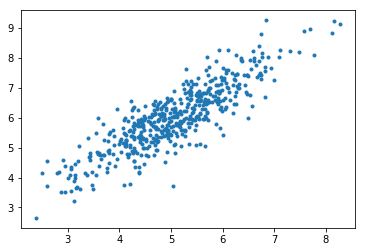

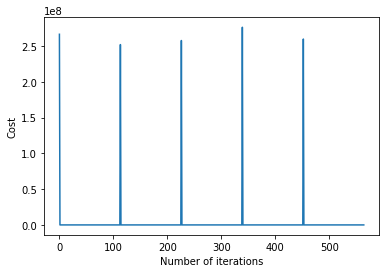

Theta: 1.1880597758263143


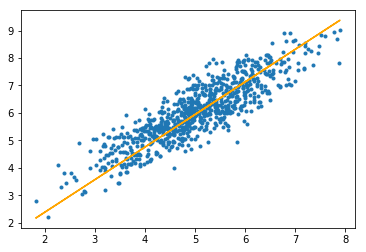

Mean absolute error =  0.47802817512469786


In [14]:
s_grad = Adagrad(learning_rate=0.001, nu=100)
do_gradiend_descend(s_grad)

In [15]:
class RMSProp(AbstractGradientDescend):
    def __init__(self, batch_size=64, nu=0.9, *args, **kwargs):
        super(RMSProp, self).__init__(*args, **kwargs)
        self.batch_size = batch_size
        self.nu = nu
        self.E = 0
    
    def create_mini_batches(self, X, y): 
        mini_batches = [] 
        # data = np.hstack((X, y)) 
        s = np.arange(X.shape[0])
        np.random.shuffle(s) 
        n_minibatches = X.shape[0] // self.batch_size 
        i = 0
    
        for i in range(n_minibatches + 1): 
            mini_batch = s[i * self.batch_size: (i + 1) * self.batch_size] 
            X_mini = X[mini_batch] 
            Y_mini = y[mini_batch]
            mini_batches.append((X_mini, Y_mini)) 
        # if X.shape[0] % self.batch_size != 0: 
        #     mini_batch = s[i * self.batch_size: s.shape[0]] 
        #     X_mini = mini_batch[:, :-1] 
        #     Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        #     mini_batches.append((X_mini, Y_mini)) 
        return mini_batches 
    
    # function to perform mini-batch gradient descent 
    def gradient_descend_step(self, X, y, theta): 
        error_list = []
        mini_batches = self.create_mini_batches(X, y) 
        E = self.E
        eps = 10 ** (-6)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            grad = self.gradient(X_mini, y_mini, theta) 
            E = self.nu * E + (1 - self.nu) * (grad * grad)
            RMS = np.sqrt(E + eps)
            theta = theta - self.nu / RMS * grad
            error_list.append(self.cost(X_mini, y_mini, theta)) 
    
        return theta, error_list


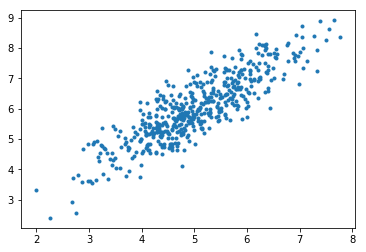

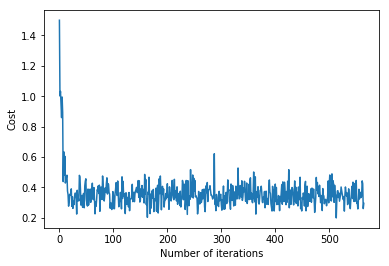

Theta: 1.1933392192822285


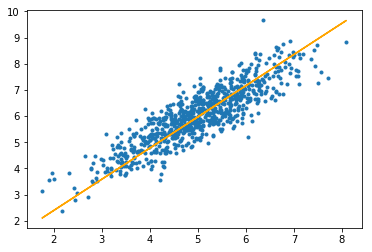

Mean absolute error =  0.4739264254651907


In [18]:
s_grad = RMSProp(nu=0.01)
do_gradiend_descend(s_grad)

In [ ]:
class Adadelta(AbstractGradientDescend):
    def __init__(self, batch_size=64, nu=0.9, *args, **kwargs):
        super(RMSProp, self).__init__(*args, **kwargs)
        self.batch_size = batch_size
        self.nu = nu
        self.E = 0
    
    def create_mini_batches(self, X, y): 
        mini_batches = [] 
        s = np.arange(X.shape[0])
        np.random.shuffle(s) 
        n_minibatches = X.shape[0] // self.batch_size 
        i = 0
    
        for i in range(n_minibatches + 1): 
            mini_batch = s[i * self.batch_size: (i + 1) * self.batch_size] 
            X_mini = X[mini_batch] 
            Y_mini = y[mini_batch]
            mini_batches.append((X_mini, Y_mini)) 
        return mini_batches 
    
    # function to perform mini-batch gradient descent 
    def gradient_descend_step(self, X, y, theta): 
        error_list = []
        mini_batches = self.create_mini_batches(X, y) 
        E = self.E
        eps = 10 ** (-6)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            grad = self.gradient(X_mini, y_mini, theta) 
            E = self.nu * E + (1 - self.nu) * (grad * grad)
            RMS = np.sqrt(E + eps)
            theta = theta - self.nu / RMS * grad
            error_list.append(self.cost(X_mini, y_mini, theta)) 
    
        return theta, error_list


In [19]:
class Adam(AbstractGradientDescend):
    def __init__(self, batch_size=64, nu=0.9, betta_1=0.1, betta_2=0.2, *args, **kwargs):
        super(Adam, self).__init__(*args, **kwargs)
        self.batch_size = batch_size
        self.nu = nu
        self.E = 0
        self.m = 0
        self.v = 0

        self.betta_1 = betta_1
        self.betta_2 = betta_2
    
    def create_mini_batches(self, X, y): 
        mini_batches = [] 
        s = np.arange(X.shape[0])
        np.random.shuffle(s) 
        n_minibatches = X.shape[0] // self.batch_size 
        i = 0
    
        for i in range(n_minibatches + 1): 
            mini_batch = s[i * self.batch_size: (i + 1) * self.batch_size] 
            X_mini = X[mini_batch] 
            Y_mini = y[mini_batch]
            mini_batches.append((X_mini, Y_mini)) 
        return mini_batches 
    
    # function to perform mini-batch gradient descent 
    def gradient_descend_step(self, X, y, theta): 
        error_list = []
        mini_batches = self.create_mini_batches(X, y) 
        E = self.E
        eps = 10 ** (-6)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            grad = self.gradient(X_mini, y_mini, theta) 
            self.m = self.betta_1 * self.m + (1 - self.betta_1) * grad
            self.v = self.betta_2 * self.v + (1 - self.betta_2) * (grad * grad)

            _m = self.m / (1 - self.betta_1)
            _v = self.v / (1 - self.betta_2)
            RMS = np.sqrt(_v + eps)
            theta = theta - self.nu / RMS * _m
            error_list.append(self.cost(X_mini, y_mini, theta)) 
    
        return theta, error_list


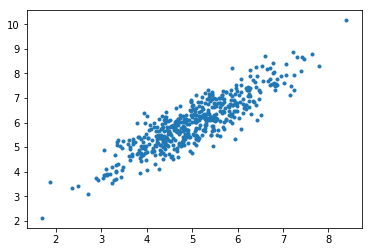

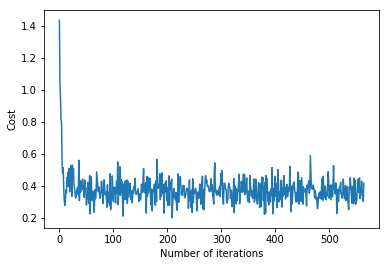

Theta: 1.1886316868589573


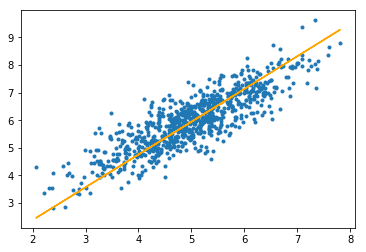

Mean absolute error =  0.4857278220387818


In [23]:
s_grad = Adam(nu=0.001, betta_1=0.9, betta_2=0.999)
do_gradiend_descend(s_grad)